# <font color="#4285f4">[Kaggle] 타이타닉 생존자 - 데이터 분석</font>

1. 문제 : 어떤 승객이 살아남고, 죽는지 확인한다.

2. 데이터 수집 : kaggle사이트에서 train.csv, test.csv 다운 

## Collecting the data

[Kaggle](https://www.kaggle.com/c/titanic/data)

In [1]:
import pandas as pd

In [2]:
# gender = pd.read_csv('./dataset/titanic/gender_submission.csv')
train = pd.read_csv('./dataset/titanic/train.csv')
test = pd.read_csv('./dataset/titanic/test.csv')

## Exploratory data analysis

In [3]:
train.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

- survived : 0 = dead, 1 = survived 
- plcass : tichet class
- sibsp : siblings, spouses
- parch : parents, children
- ticket 
- cabin : cabin number 
- embarked : 선착장 

In [5]:
test.head() #survived 데이터만 없다. 우리가 학습시켜서 알아내야 함. 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.shape # row, feature(column)

(891, 12)

In [9]:
test.shape

(418, 11)

In [13]:
train.info() # 유실된 정보가 있다 -> feautre engineering 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [16]:
train.isnull().sum() #유실된 정보의 개수를 보여준다. 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.isnull().sum() #유실된 정보의 개수를 보여준다. 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Import Visualization Libraries

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn default for plots

## Bar Chart for Categorical Features

- Pclass
- Sex
- SibSp
- Parch
- Embarked
- Cabin

In [19]:
def bar_chart(feature) :
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

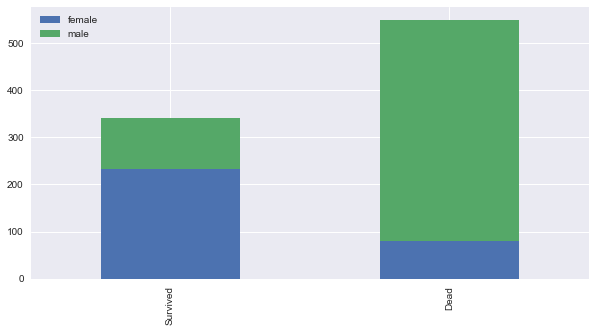

In [20]:
bar_chart('Sex') 

가설1 : Women more likely survived than man

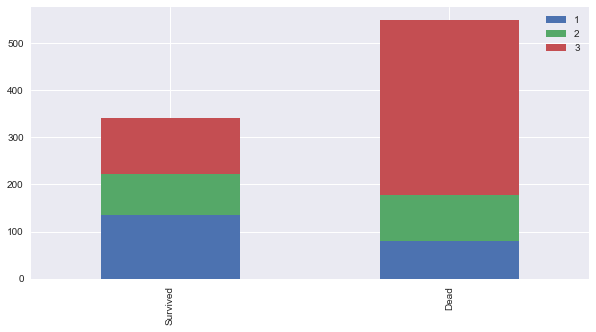

In [21]:
bar_chart('Pclass')

가설2 : 3rd class more likely dead than other classes

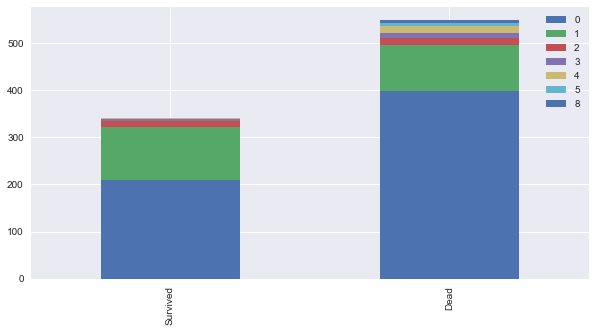

In [23]:
bar_chart('SibSp')

가설3 : a person aboarded with more than 2 siblings or spouse more likely survived

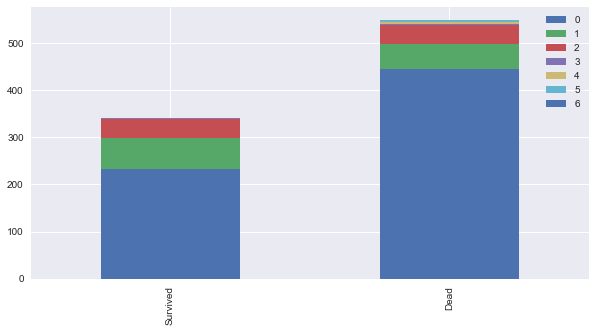

In [24]:
bar_chart('Parch')

가설4 : a person aboarded with more than 2 parents or children more likely survived

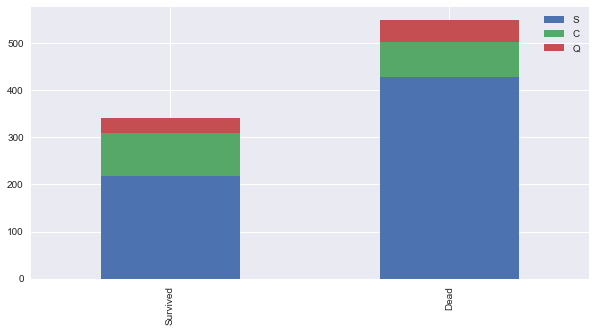

In [25]:
bar_chart('Embarked')

가설5 : a person aboarded from S more likely dead

# <font color="#4285f4">Feature Engineering</font>

1. feature : 데이터의 columns 
2. feature 벡터로 만들어줘야 한다. ※ 벡터 : 숫자들의 배열 
3. null, NaN 들을 의미있는 값으로 만들어줘야 한다. 

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## how titanic sank?

1. 빙하에 부딪히여 구멍이 나고 침수가 생김
2. 앞쪽의 3등급 칸부터 가라앉음 -> classfier에 넣어야 한다.
3. feature 
    - name : Mr, Mrs는 결혼 여부와 성별을 알려준다.

## Name

In [28]:
train_test_data = [train, test] #combining train and test dataset

for dataset in train_test_data : 
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [29]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Lady          1
Jonkheer      1
Sir           1
Countess      1
Ms            1
Capt          1
Don           1
Mme           1
Name: Title, dtype: int64

In [30]:
 test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [32]:
#ML classifier는 숫자만 인식하기 때문에 이렇게 매핑해준다. 
title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                "Master":3, "Dr":3, "Rev":3, "col":3, "Major":3, "Mile":3, "Countess":3,
                 "Ms":3, "Lady":3, "Jonkheer":3, "Don":3, "Dona":3 , "Mme":3, "Capt":3, "Sir":3    
                }

for dataset in train_test_data : 
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


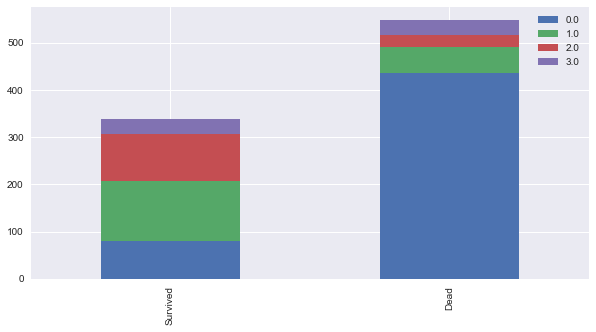

In [34]:
bar_chart('Title')

#0 : mr
#1,2 : Mrs, Miss

In [35]:
train.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0.0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,3.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,2.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,2.0


In [36]:
#나이를 구하는 법 
#남자라면 남자의 평균 나이, 결혼 여성이라면 결혼 여성의 평균 나이를 쓴다. 


## Binning

sequence 를 카테고리 별로 나눈다.

## Feature Scaling 

남자 : 0, 여자 : 1
ticket1 : 10, ticket2 : 20 일 때,

머신러닝은 남자와 여자의 차이보다, 티켓의 차이가 더 크므로 
티켓이 더 영향력 있는 classifier라고 인식한다. 

따라서, 모든 classifier의 범위가 너무 크게 차이나지 않도록 스케일을 맞춰줘야 한다. 

# <font color="#4285f4">Modeling, Validation, Testing</font>

**k-fold cross validation**

테스트 데이터를 등분하여 각각의 데이터들을 테스트한 후 정확도의 평균을 구한다.

**modeling**

사이킷런에서 머신러닝 알고리즘을 사용한다.

**Teting**

많은 알고리즘으로 테스트한 뒤, 가장 높은 정확도를 보인 알고리즘으로 테스트 데이터를 검증한다.

